In [1]:
import cv2
import matplotlib.pyplot as plt

In [88]:
img = cv2.imread('elephant.jpg')

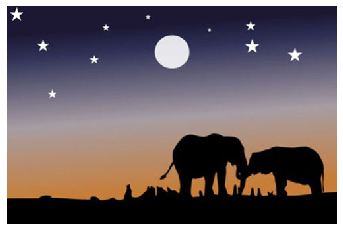

In [89]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

In [90]:
org_shape = img.shape
print(img.shape)
print(img)

(330, 500, 3)
[[[23 19 46]
  [25 21 48]
  [28 24 51]
  ...
  [28 24 51]
  [28 24 51]
  [28 24 51]]

 [[29 25 52]
  [30 26 53]
  [30 26 53]
  ...
  [28 24 51]
  [28 24 51]
  [28 24 51]]

 [[29 25 52]
  [28 24 51]
  [27 23 50]
  ...
  [28 24 51]
  [28 24 51]
  [28 24 51]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]


In [91]:
img = img.reshape((-1,3))

In [92]:
print(img)

[[23 19 46]
 [25 21 48]
 [28 24 51]
 ...
 [ 0  0  0]
 [ 0  0  0]
 [ 0  0  0]]


In [93]:
#plotting

from sklearn.cluster import KMeans

In [106]:
km = KMeans()
km.fit(img)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [107]:
centers = km.cluster_centers_

In [108]:
print(centers)

[[168.36122326 149.08719494 144.51925279]
 [  1.35195791   0.75409169   1.099218  ]
 [ 55.64943572  55.11026073  88.0227656 ]
 [189.38802693 132.00911825  81.91344823]
 [ 91.83619501  88.76212558 113.20929941]
 [232.877429   232.57025411 236.83931241]
 [127.48817025 121.49250981 138.81750089]
 [ 31.56002345  27.85388824  54.77842907]]


In [109]:
import numpy as np
centers = np.array(centers,dtype='uint8')

print(centers)

[[168 149 144]
 [  1   0   1]
 [ 55  55  88]
 [189 132  81]
 [ 91  88 113]
 [232 232 236]
 [127 121 138]
 [ 31  27  54]]


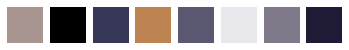

In [110]:
#subplot
import matplotlib.pyplot as plt
i = 1

center_list = []
for col in centers:
    plt.subplot(1,8,i)
    plt.axis("off")
    i+=1
    #plt.imshow()
    center_list.append(col)
    
    a = np.zeros((50,50,3),dtype='uint8')
    a[:,:,:] = col
    plt.imshow(a)

In [111]:
# i have img containing image pixels (img)
# center array (center_list)
# now to find each pixel to closest center

In [112]:
print(center_list)

[array([168, 149, 144], dtype=uint8), array([1, 0, 1], dtype=uint8), array([55, 55, 88], dtype=uint8), array([189, 132,  81], dtype=uint8), array([ 91,  88, 113], dtype=uint8), array([232, 232, 236], dtype=uint8), array([127, 121, 138], dtype=uint8), array([31, 27, 54], dtype=uint8)]


In [113]:
# using Kmeans Algo
print(img.shape)
print(km.labels_)
print(km.labels_.shape)

(165000, 3)
[7 7 7 ... 1 1 1]
(165000,)


(165000, 3)


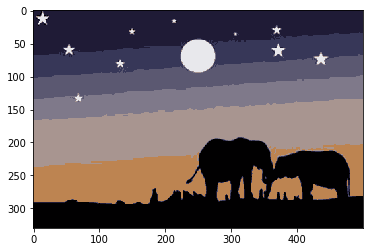

(330, 500, 3)


In [115]:

new_img = np.zeros((km.labels_.shape[0],3),dtype='uint8')
print(new_img.shape)

for px in range(new_img.shape[0]):
    new_img[px] = center_list[km.labels_[px]]

new_img = new_img.reshape((org_shape))
plt.imshow(new_img) 
plt.show()
print(new_img.shape)